In [1]:
import os
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""

In [2]:
!kaggle datasets download -d robikscube/hourly-energy-consumption

 61% 7.00M/11.4M [00:00<00:00, 30.0MB/s]
100% 11.4M/11.4M [00:00<00:00, 38.0MB/s]


In [3]:
!unzip /content/hourly-energy-consumption.zip

Archive:  /content/hourly-energy-consumption.zip
  inflating: AEP_hourly.csv          
  inflating: COMED_hourly.csv        
  inflating: DAYTON_hourly.csv       
  inflating: DEOK_hourly.csv         
  inflating: DOM_hourly.csv          
  inflating: DUQ_hourly.csv          
  inflating: EKPC_hourly.csv         
  inflating: FE_hourly.csv           
  inflating: NI_hourly.csv           
  inflating: PJME_hourly.csv         
  inflating: PJMW_hourly.csv         
  inflating: PJM_Load_hourly.csv     
  inflating: est_hourly.paruqet      
  inflating: pjm_hourly_est.csv      


In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [468]:
df = pd.read_csv('/content/AEP_hourly.csv', parse_dates=[0])
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [469]:
df = df[:-120273] 

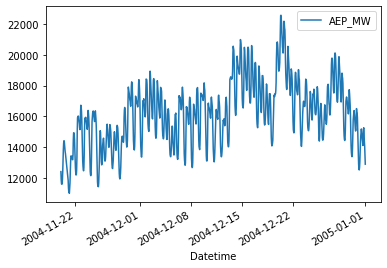

In [470]:
df.plot(x='Datetime')
plt.show()

In [471]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled = minmaxscaler.fit_transform(df[['AEP_MW']])
df[['AEP_MW']] = scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [472]:
df_train, df_test = train_test_split(df, test_size=0.1, shuffle=False)

In [473]:
df_train, df_val = train_test_split(df_train, test_size=0.2, shuffle=False)

In [486]:
energy_train = df_train['AEP_MW'].values.reshape((len(energy_train)), 1)
energy_val = df_val['AEP_MW'].values.reshape((len(energy_val)), 1)
energy_test = df_test['AEP_MW'].values.reshape((len(energy_test)), 1)

In [487]:
train_sets = TimeseriesGenerator(energy_train, energy_train, length=2, batch_size=1)
val_sets = TimeseriesGenerator(energy_val, energy_val, length=2, batch_size=1)
test_sets = TimeseriesGenerator(energy_test, energy_test, length=2, batch_size=1)

In [489]:
for i in range(1):
	x, y = test_sets[i]
	print('%s => %s' % (x, y))

[[[16202.]
  [16062.]]] => [[15836.]]


In [434]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, input_shape=(2,1)),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit_generator(train_sets, epochs=150, validation_data=val_sets)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
718/718 [==============================] - 4s 3ms/step - loss: 0.0894 - mae: 0.3830 - val_loss: 0.0111 - val_mae: 0.1249
Epoch 2/150
718/718 [==============================] - 2s 2ms/step - loss: 0.0198 - mae: 0.1589 - val_loss: 0.0167 - val_mae: 0.1537
Epoch 3/150
718/718 [==============================] - 2s 3ms/step - loss: 0.0124 - mae: 0.1244 - val_loss: 0.0208 - val_mae: 0.1697
Epoch 4/150
718/718 [==============================] - 2s 2ms/step - loss: 0.0142 - mae: 0.1345 - val_loss: 0.0215 - val_mae: 0.1722
Epoch 5/150
718/718 [==============================] - 2s 3ms/step - loss: 0.0131 - mae: 0.1306 - val_loss: 0.0215 - val_mae: 0.1723
Epoch 6/150
718/718 [==============================] - 2s 3ms/step - loss: 0.0130 - mae: 0.1281 - val_loss: 0.0213 - val_mae: 0.1717
Epoch 7/150
718/718 [==============================] - 2s 3ms/step - loss: 0.0129 - mae: 0.1279 - val_loss: 0.0212 - val_mae: 0.1710
Epoch 8/150
718/718 [==============================] - 2s 3ms/step - 

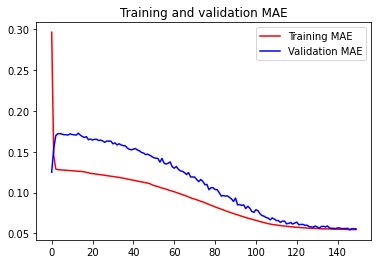

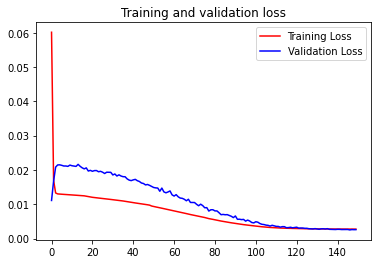

In [435]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [493]:
test_data = test_sets.data.copy()
for i in range(len(test_data)-3):
  topred = test_data[i+1:i+3,0]
  topred = topred.reshape(1, 2, 1)
  prediction = model.predict_generator(topred)
  test_data[2+i] = prediction

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [478]:
df_test['Pred'] = test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [479]:
rescale1 = minmaxscaler.inverse_transform(df_test[["AEP_MW"]])
rescale2 = minmaxscaler.inverse_transform(df_test[["Pred"]])

In [480]:
df_test[["AEP_MW"]] = rescale1
df_test[["Pred"]] = rescale2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

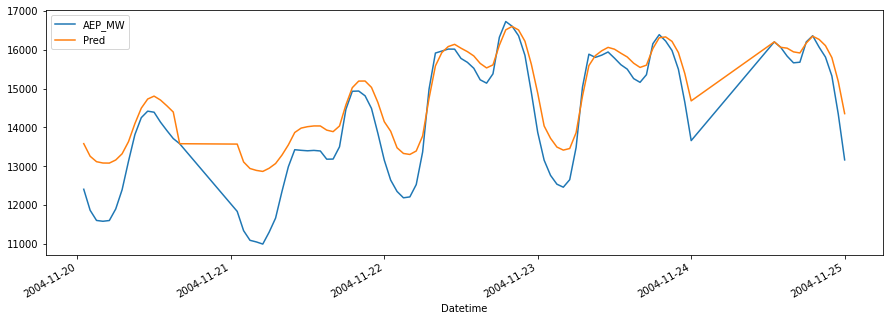

In [483]:
df_test.plot(x='Datetime', y=["AEP_MW","Pred"], figsize=(15,5))
plt.show()